In [20]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
data = load_wine()
X = data.data
y = data.target

data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
accuracy_score(y_test,rf.predict(X_test))

1.0

In [25]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

In [26]:
rf_lda = RandomForestClassifier(random_state=42)
rf_lda.fit(X_train_lda,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred_lda = rf_lda.predict(X_test_lda)
accuracy_score(y_test, y_pred_lda)

0.9722222222222222

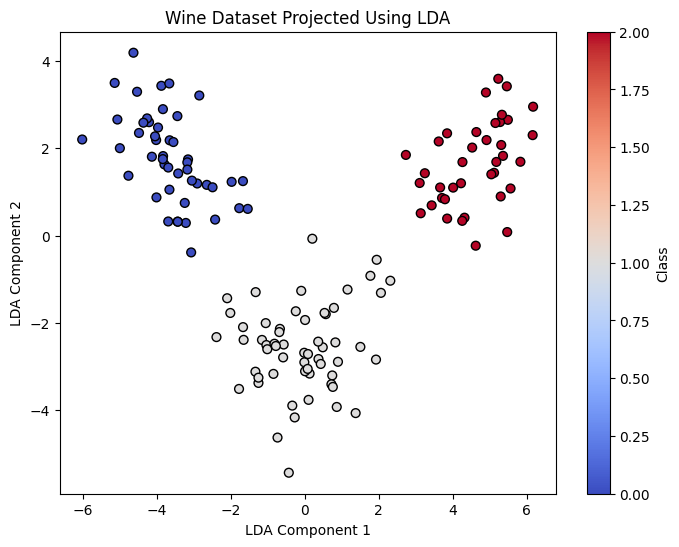

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='coolwarm', s=40, edgecolors='k')
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Wine Dataset Projected Using LDA")
plt.colorbar(label="Class")
plt.show()